In [2]:
# Primeiro importamos a biblioteca Pandas para fazer a leitura da base de dados

import pandas as pd

vendas = pd.read_csv('train.csv')

In [4]:
# Utilizamos o método head para nos dar uma pequena amostra de como a base de dados se parece

vendas.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [6]:
# Fazemos a transição das colunas Order Date e Ship Date para o formato de data, para que possamos manipular os dados
# através das datas futuramente. Também alterei o tipo de dado de Postal Code para object, já que não faremos operações
# matemáticas com o código postal e alguns códigos possuem zero na frente, o que não é possível com um inteiro.

vendas['Order Date'] = vendas['Order Date'].astype('datetime64[ns]')
vendas['Ship Date'] = vendas['Ship Date'].astype('datetime64[ns]')
vendas['Postal Code'] = vendas['Postal Code'].astype('object')

In [8]:
# Verificamos se os tipos de dados estão de acordo com o que queremos

vendas.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [10]:
# Usamos o método describe para dar uma olhada nas estatísticas das nossas colunas numéricas e entender um pouco melhor
# como os valores se distribuem.

vendas.describe()

,Row ID,Order Date,Ship Date,Sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-04-12 14:24:35.265306368,2017-04-21 19:45:12.489796096,230.769059
min,1.000000,2015-01-02 00:00:00,2015-01-04 00:00:00,0.444000
25%,2450.750000,2016-05-02 12:00:00,2016-05-08 00:00:00,17.248000
50%,4900.500000,2017-05-30 00:00:00,2017-06-12 00:00:00,54.490000
75%,7350.250000,2018-04-11 00:00:00,2018-05-02 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-05-01 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


In [12]:
# Utilizando o método isnull podemos verificar que existem 11 linhas na coluna Postal Code com valores nulos.

vendas.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [14]:
# Localizando as linhas que possuem esses valores nulos, podemos perceber que parece estar ligada à cidade "Burlington"
# em Vermont

vendas.loc[pd.isna(vendas['Postal Code'])]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [16]:
# Isolei essas características para verificar e podemos perceber que é exatamente isso, verificando pela quantidade de linhas
# que também é igual a 11 onde a cidade Burlington aparece.

vendas.loc[(vendas['City'] == 'Burlington') & (vendas['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [18]:
# Através de uma rápida pesquisa na internet pude localizar o código postal da cidade Burlington em Vermont. Fazemos então
# o preenchimento das linhas vazias com esse código

vendas['Postal Code'] = vendas['Postal Code'].fillna('05401')

In [20]:
# Verificando se agora estão devidamente preenchidas

vendas.loc[(vendas['City'] == 'Burlington') & (vendas['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,05401,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,05401,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [22]:
# Agora podemos conferir e perceber que não existem mais valores nulos na nossa base de dados.

vendas.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [24]:
# Fiz o import das bibliotecas que vou utilizar para plotar alguns gráficos e visualizar melhor os dados que estou analisando

import matplotlib.pyplot as plt
import seaborn as sns

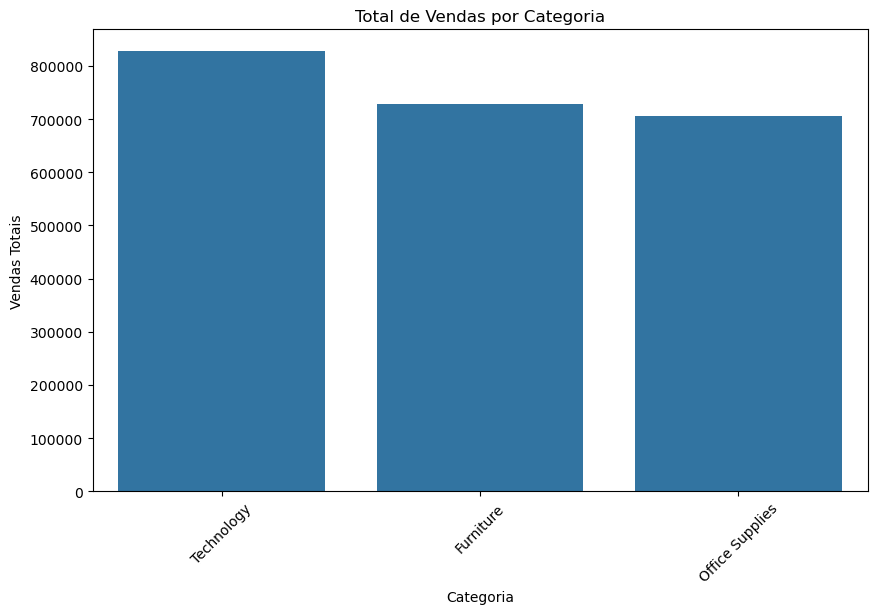

In [25]:
# Primeiro resolvi verificar a quantidade vendida por categoria. Percebemos que o valor total em vendas não difere muito
# entre as categorias, mas a categoria "Technology" lidera com uma certa vantagem das outras.

# Vendas totais por categoria
category_sales = vendas.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

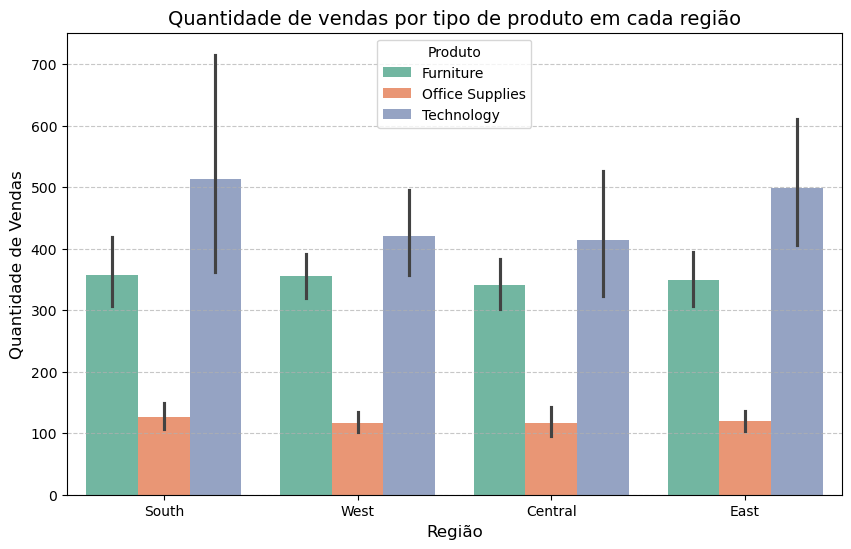

In [28]:
# Achei importante verificar a quantidade de vendas em cada região. Podemos verificar um padrão nas quatro regiões com relação
# a quantidade de vendas por categoria, mas também percebemos que mesmo o categoria "Technology" sendo a que mais venda, em questão
# de valor total de venda, ela não fica tão à frente, portanto as outra categorias claramente possuem produtos de valor mais elevado

plt.figure(figsize=(10, 6))
sns.barplot(data=vendas, x='Region', y='Sales', hue='Category', palette='Set2')

# Personalizar o gráfico
plt.title('Quantidade de vendas por tipo de produto em cada região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.legend(title='Produto')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

In [30]:
# Verifiquei a quantidade de vendas por região e podemos perceber que West é a região com mais atividade.

vendas['Region'].value_counts()

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

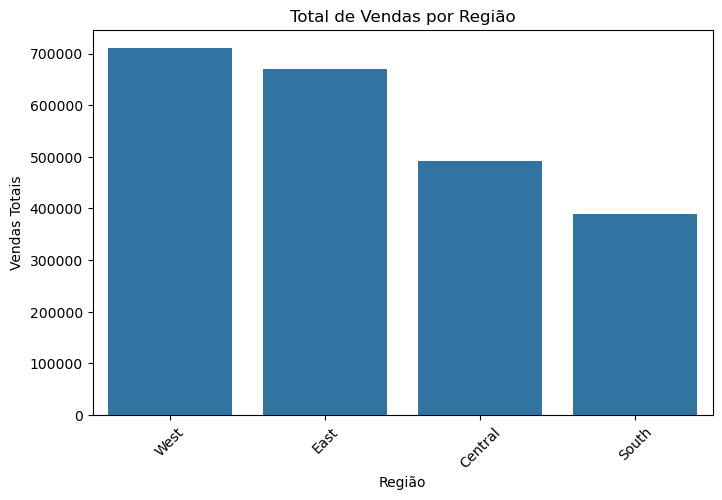

In [32]:
# Resolvi verificar com um gráfico de barras o total vendido por região e podemos perceber que mesmo a região West
# sendo a que mais vende em quantidade, a região East não fica muito atrás no valor acumulado.

# Vendas totais por região
region_sales = vendas.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

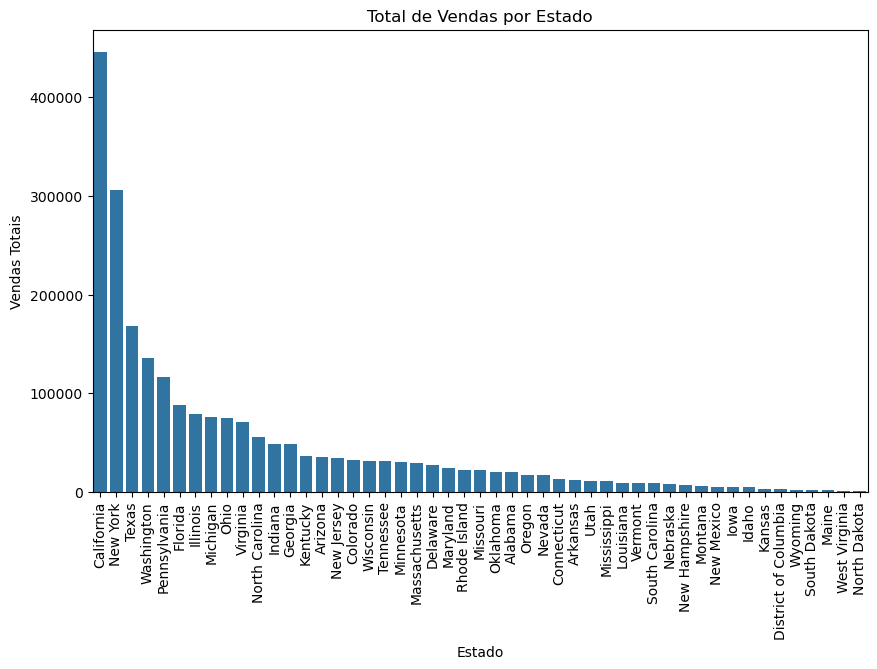

In [34]:
# Ao verificar o valor total vendido por estado, verificamos que California e New York estão disparados na quantidade de vendas
# o que pode ter influenciado no total de vendas por regiões.

# Vendas totais por estado
state_sales = vendas.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Total de Vendas por Estado')
plt.xlabel('Estado')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

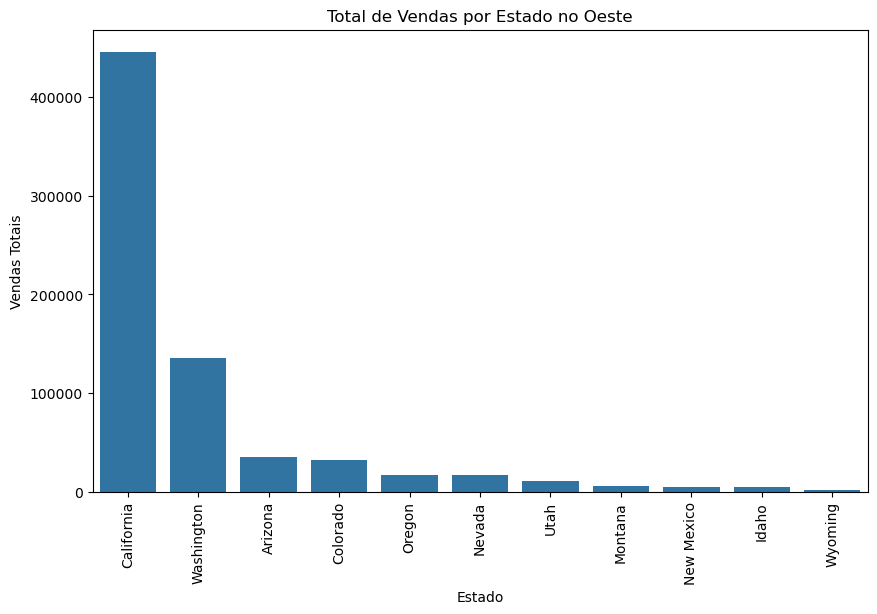

In [36]:
# Resolvi então fazer uma análise no total vendido nos Estados de cada região


# Vendas totais por estado na Região West
vendas_west = pd.DataFrame(vendas)
vendas_west = vendas.loc[vendas['Region'] == 'West']
state_sales = vendas_west.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Total de Vendas por Estado no Oeste')
plt.xlabel('Estado')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

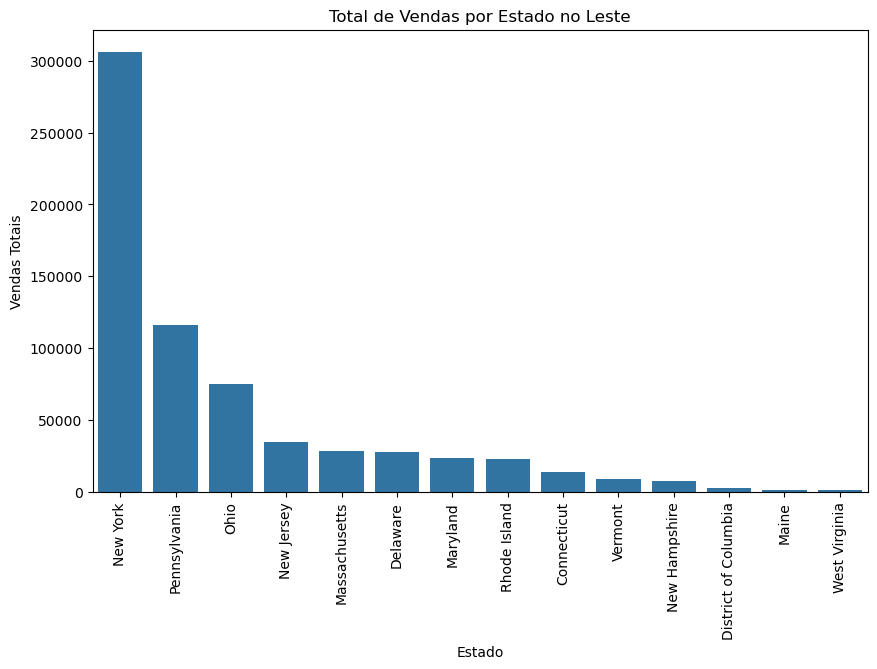

In [38]:
# Vendas totais por estado na Região East
vendas_east = pd.DataFrame(vendas)
vendas_east = vendas.loc[vendas['Region'] == 'East']
state_sales = vendas_east.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Total de Vendas por Estado no Leste')
plt.xlabel('Estado')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

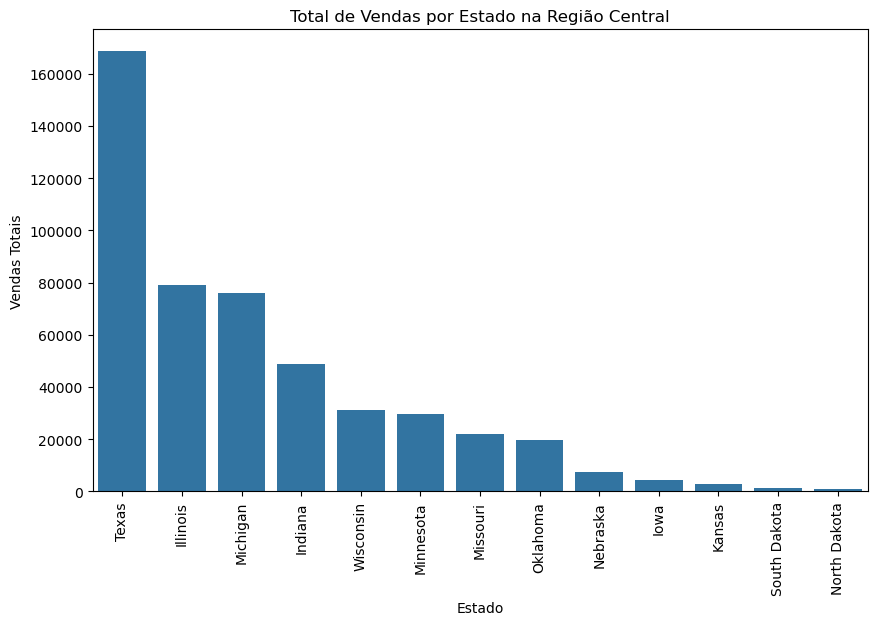

In [40]:
# Vendas totais por estado na Região Central
vendas_central = pd.DataFrame(vendas)
vendas_central = vendas.loc[vendas['Region'] == 'Central']
state_sales = vendas_central.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Total de Vendas por Estado na Região Central')
plt.xlabel('Estado')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

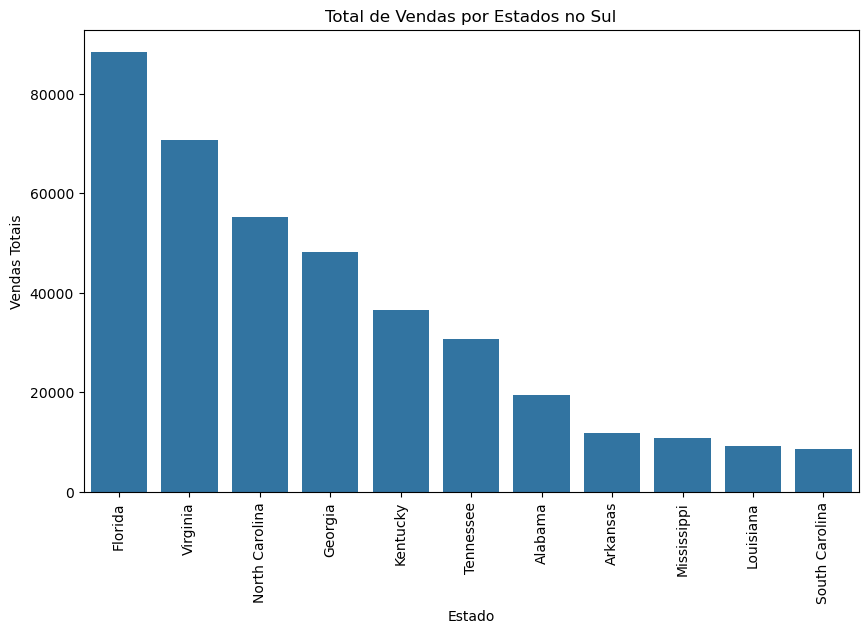

In [42]:
# Vendas totais por estado na Região Soutt
vendas_south = pd.DataFrame(vendas)
vendas_south = vendas.loc[vendas['Region'] == 'South']
state_sales = vendas_south.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Plotando
plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('Total de Vendas por Estados no Sul')
plt.xlabel('Estado')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

In [44]:
# O que pude perceber é que enquanto no Oeste e Leste as vendas se concentraram em um único estado, na região central e sul
# isso parece estar um pouco melhor distribuído. Por exemplo, na região com mais vendas, "West", com excessão de California e
# Washington, os outros estados venderam bem menos que a maioria dos estados da Região "South".

In [46]:
# Para analisar o desempenho das vendas mês a mês ao longo dos anos, extraí o mês e o ano da coluna Order Date

vendas['Month'] = vendas['Order Date'].dt.month
vendas['Year'] = vendas['Order Date'].dt.year

<Figure size 1200x600 with 0 Axes>

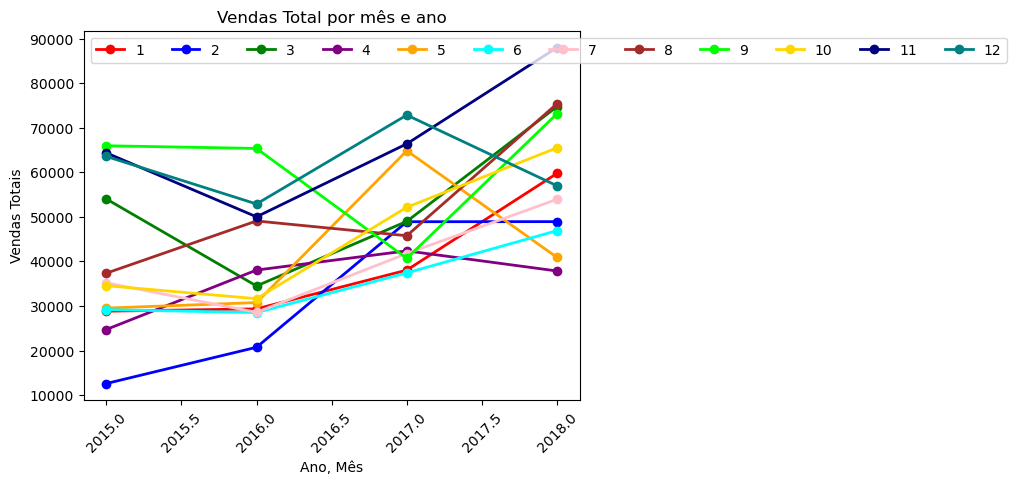

In [52]:
# Com essas colunas criadas, consegui fazer um cruzamento delas e verificar o desempenho das vendas em cada mês ao longo dos anos

monthly_sales = vendas.groupby(['Year', 'Month'])['Sales'].sum().unstack(fill_value=0)

cores = [
    'red', 'blue', 'green', 'purple', 'orange', 'cyan', 
    'pink', 'brown', 'lime', 'gold', 'navy', 'teal'
]

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', linewidth=2, color = cores)
plt.title('Vendas Total por mês e ano')
plt.legend(loc='upper left', ncol=len(monthly_sales.columns))
plt.xlabel('Ano, Mês')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Podemos perceber que os 5 últimos meses do ano costumam liderar o montante total de vendas

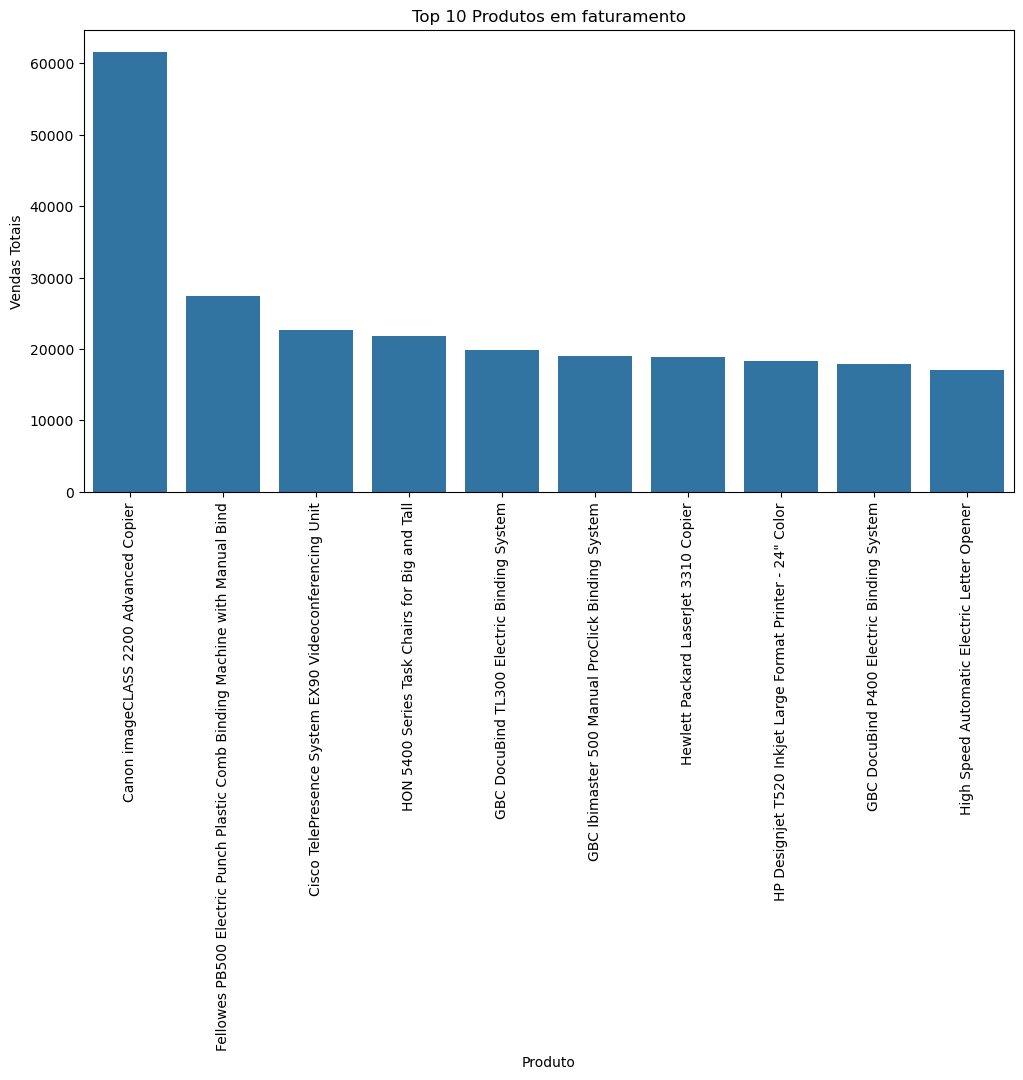

In [54]:
# É de suma importancia verificar quais os produtos que mais geram faturamento para a empresa. Com esse gráfico podemos verificar
# exatamente isso. Esses são os 10 produtos com maior faturamento.

top_products = vendas.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Produtos em faturamento')
plt.xlabel('Produto')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)
plt.show()

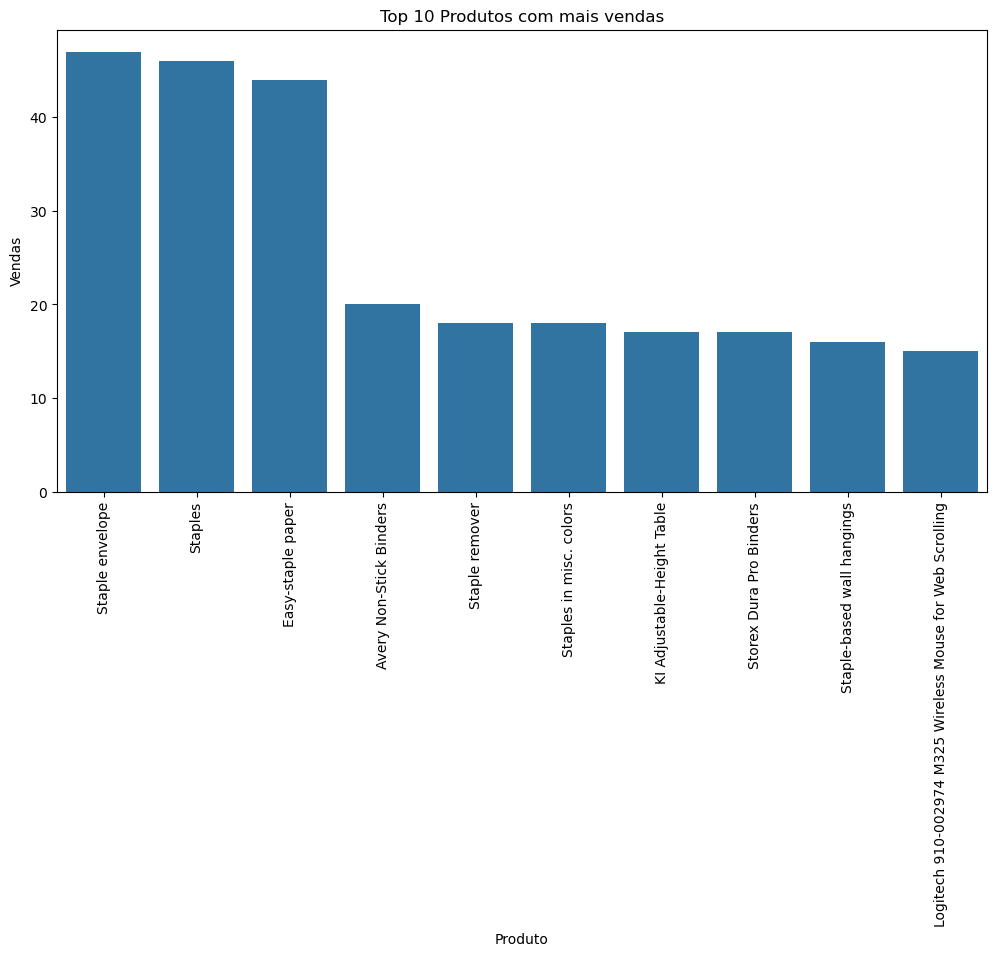

In [56]:
# Mesmo sendo os produtos com maior faturamento, não necessariamente são os produtos com mais ocorrências de venda. Esse gráfico
# mostra os 10 produtos que mais tem vendas realizadas.

top_count_products = vendas.groupby('Product Name')['Sales'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_count_products.index, y=top_count_products.values)
plt.title('Top 10 Produtos com mais vendas')
plt.xlabel('Produto')
plt.ylabel('Vendas')
plt.xticks(rotation=90)
plt.show()

In [306]:
# Aqui começa a parte mais desafiadora para mim até o momento. Resolvi aplicar o modelo ARIMA para tentar prever as vendas
# dos próximos 7 dias baseados nos dados históricos e possuo. Clonei a base de dados e realizei algumas alterações necessárias
# como mudança de tipos, por exemplo.

daily_sales_study = pd.DataFrame(vendas['Order Date'])
daily_sales_study['Sales'] = vendas['Sales']

daily_sales_study = daily_sales_study.groupby('Order Date').agg({'Sales' : 'sum'}).reset_index()
daily_sales_study.columns = ['Order Date', 'Sales']
daily_sales_study['Sales'] = daily_sales_study['Sales'].astype('int64')
daily_sales_study.dtypes

Order Date    datetime64[ns]
Sales                  int64
dtype: object

In [310]:
# Utilizei a biblioteca sklearn para fazer a divisão da base de dados para realizar o treinamento do modelo e depois
# o teste

from sklearn.model_selection import train_test_split


# Dividir os dados em treino e teste (60% para treino, 40% para teste)
train_data, test_data = train_test_split(daily_sales_study['Sales'], test_size=0.4, shuffle=False)
print(train_data, test_data)

0       468
1      2203
2       119
3      5188
4       601
       ... 
733    1229
734     577
735    2475
736    5310
737     893
Name: Sales, Length: 738, dtype: int64 738     1919
739      778
740      877
741      191
742     1352
        ... 
1225     814
1226     177
1227    1657
1228    2915
1229     713
Name: Sales, Length: 492, dtype: int64


In [312]:
# Utilizando a ferramenta adfuller e garanti que as bases de dados eram estacionárias.

from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


result1 = adfuller(test_data)
print('ADF Statistic:', result1[0])
print('p-value:', result1[1])

ADF Statistic: -25.155868275374257
p-value: 0.0
ADF Statistic: -20.538024912528094
p-value: 0.0


In [314]:
# Importei a ferramenta ARIMA para realizar as previsões.

from statsmodels.tsa.arima.model import ARIMA

# Ajustando o modelo ARIMA para fazer o treinamento
model_train = ARIMA(train_data, order=(1, 1, 0))
model_train_fit = model.fit()

# Fazendo a previsão para os próximos 7 dias
forecast_train = model_train_fit.forecast(steps=7)
print(forecast_train)


492    2021.344324
493    2119.310515
494    2126.646026
495    2127.195294
496    2127.236422
497    2127.239502
498    2127.239733
Name: predicted_mean, dtype: float64


C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [316]:
# Ajustando o modelo ARIMA para fazer meus testes
model = ARIMA(test_data, order=(1, 1, 0))
model_fit = model.fit()

# Fazendo a previsão para os próximos 7 dias
forecast = model_fit.forecast(steps=7)
print(forecast)

492    1806.327261
493    1263.473265
494    1533.008720
495    1399.180173
496    1465.628129
497    1432.635685
498    1449.016946
Name: predicted_mean, dtype: float64


C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arthur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

In [322]:
# Resolvi dar uma olhada nos valores que o modelo ARIMA me retornou e mudar o index para as datas dos próximos 7 dias.

visu = pd.DataFrame(forecast).reset_index()
visu['index'] = visu['index'] - 491

start_date = daily_sales_study['Order Date'].max()
visu['index'] = pd.date_range(start=start_date, periods=7, freq='D')

visu

,index,predicted_mean
0,2018-12-30,1806.327261
1,2018-12-31,1263.473265
2,2019-01-01,1533.008720
3,2019-01-02,1399.180173
4,2019-01-03,1465.628129
5,2019-01-04,1432.635685
6,2019-01-05,1449.016946


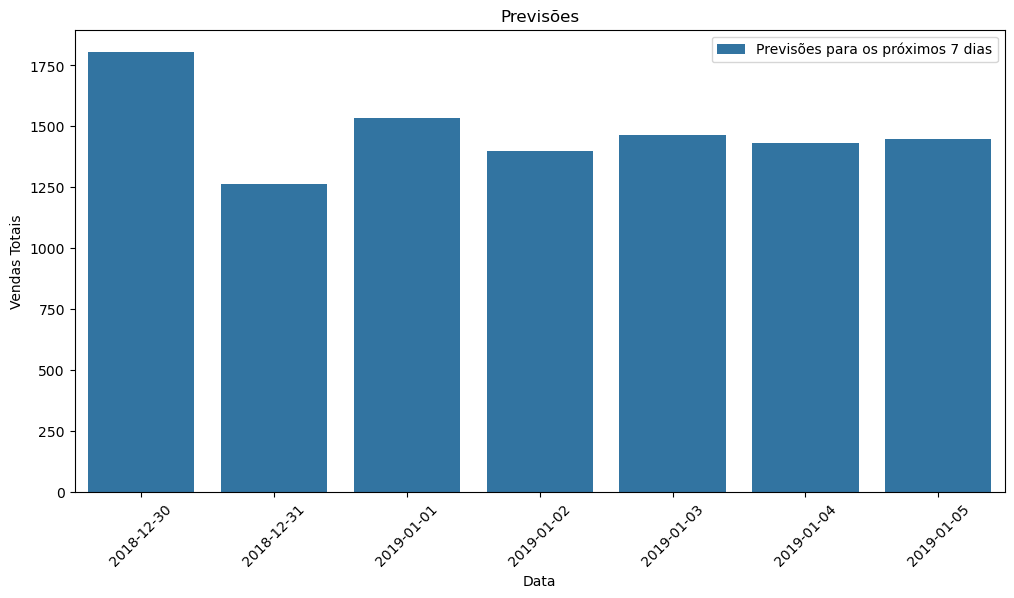

In [326]:
# Plotando as vendas reais e as previsões. Podemos perceber que as vendas nos próximos sete dias permanecerão na média
# das vendas diárias.

plt.figure(figsize=(12,6))

# Previsões
sns.barplot(x=visu['index'], y=forecast.values, label='Previsões para os próximos 7 dias')

plt.title('Previsões')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.legend()
plt.xticks(rotation=45)
plt.show()